## Notes

 
Types of clustering
1. Prototype based clustering, Eg: Kmeans clustering 
2. Hierarchical clustering 
3. Density-based clsutering

<strong>Kmeans : </strong>
1. Randomly pick k centroids(or metorids) from the sample points as initial cluster centers.
2. Assign each sample to the nearest centroid.
3. Move the centroids to the center of the samples that were assigned to it.
4. Repeat steps 2 and 3 until the cluster assignments do not change or a user-defined tolerance or maximum number of iterations is reached.

<strong>Math </strong>
1. Distance is inversely proportion to similarity
2. Distance between two points in the data is calculated by Squared Euclidean distance
3. We need to minimize the distance between points within a cluster and cluster centroid using the Euclidean distance iteratively(m


<img src="files/optimize-kmeans.png">

In [6]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

%matplotlib inline

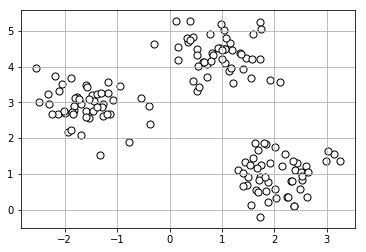

In [7]:
X, y = make_blobs(n_samples=150,
                  n_features=2,
                   centers=3,
                    cluster_std=0.5,
                  shuffle=True,
                  random_state=0)


plt.scatter(X[:,0],
           X[:,1],
             c='white',
           marker='o',
            edgecolor='black',
            s=50)
plt.grid()
plt.show()


In [8]:
# creating clusters

from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, 
           init='random', 
           n_init=10,
           max_iter=300, 
          tol=1e-04,
        random_state=0)
y_km = km.fit_predict(X)

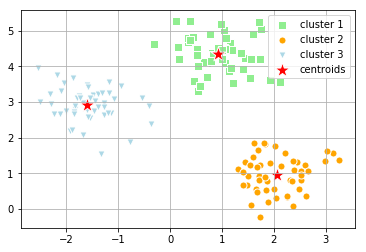

In [14]:
# plotting cluster centers

plt.scatter(X[y_km == 0, 0],
         X[y_km == 0, 1],
         s=50, c='lightgreen',
         marker='s', edgecolor='white',
         label='cluster 1')
plt.scatter(X[y_km == 1, 0],
         X[y_km == 1, 1],
         s=50, c='orange',
         marker='o', edgecolor='white',
         label='cluster 2')
plt.scatter(X[y_km == 2, 0],
         X[y_km == 2, 1],
         s=50, c='lightblue',
         marker='v', edgecolor='white',
         label='cluster 3')
plt.scatter(km.cluster_centers_[:, 0],
         km.cluster_centers_[:, 1],
         s=250, marker='*',
         c='red', edgecolor='white',
         label='centroids')
plt.legend(scatterpoints=1)
plt.grid()
plt.show() 

In [19]:
# K means clustering from scratch

class K_Means():
    def __init__(self, k=3, tolerance = 0.0001, max_iterations = 500):
        self.k = k
        self.tolerance = tolerance
        self.max_iterations = iterations 
    
    def fit(self, data):
        
        self.centroids = {}
        
        #intialize centroids randomly, lets take first 3 elements in our data set as our initial centroids
        for i in range(self.k):
            self.centroids[i] = data[i]
            
        
        #begin iterations
        for i in range(self.max_iterations):
            self.classes  = {}
            for i in range(self.k):
                self.classes[i] = []
                
            for features in data:
                distances = np.linalg.norm(features-self.centroids[centroid] for centroid in self.centroids)
                classification = distances.index(min(distances))
                self.classes[classification].append(features)
                
            previous = dict(self.centroids)
            
            for classification in self.classes:
                self.centroid[classification] = np.average(self.classes[classification], axis = 0)
                
            isOptimal = True
            
            for centroid in self.centroids:
                
                original_centroid = previous[centroid]
                curr = self.centroid[centroid]
                
                if np.sum((curr - original_centroid)/original_centroid * 100.0) > self.tolerance:
                    isOptimal = False
                    
                    
                if isOptimal:
                    break
                    
    def pred(self, data):
        distances = [np.linalg.norm(data - self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification

                    
def main():
    return
            

<strong>Disadvantages </strong>
1. Number of clusters need to be guessed
2. Beacuse of random choice of the initial cluster centres, it might result in bad clusters or bad convergence


We can use kmeans multiple times on a dataset and choose the best performing model interms of SSE. Another way is to place centriods far away from each other via Kmeans++ algorithm.
There is hard clustering and soft clustering. In hard clusters, we asisign each point to a single cluster where as in soft clusters. we assign probabilities that a point belong to each cluster. Soft clustering can be done using 'fuzzy kmeans' or 'soft k-means'. Objective function is very similar to the one we used for k means, 

<img src="files/optimize-kmeans-fuzzy.png">

But, the value of w here ranges between 0 and 1 and m in the equation is fuzziness coefficient. or fuzzifier that controls degree of fuzziness. The larger the value of m the smaller the cluster membership becomes which leads to fuzzier clsuters. Fuzzy C-means is not available in sklearn 

### Using elbow method to find the optimal number of clusters

In [15]:
print('Distortion: %.2f' % km.inertia_)

Distortion: 72.48


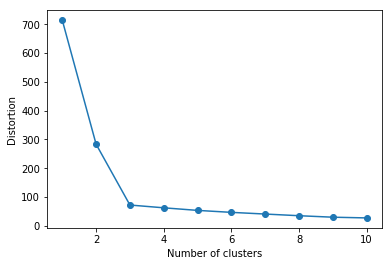

In [18]:
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i,
             init='k-means++',
             n_init=10,
             max_iter=300,
             random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)
plt.plot(range(1,11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

We can see in the plot, the elbow is located at k=3, which is evidence that k=3 is indeed a good choice for number of clusters as distortion is rapidly increasing when clusters size decrease from 10 to 2

### Quantifying the quality of clustering via silhouette plots

As we know we dont have any target variable in this clustering, in order to evaluate the peformance of the model or hyper parameter tune the mode we should use intrinsic methods like elbow method. There is another method is sillhoutte plots. It can be applied to other clustering algorithms except k-means



### Fixes & Doubts

1. Image rendering in github
2. Why can't we use silhouette plots in k-means?

### Resources:

https://github.com/madhug-nadig/Machine-Learning-Algorithms-from-Scratch